## Processing dice rolls from recorded Catan games (2016-2019)

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
# Data from Taylor Patch
data_vec = [5,7,7,3,12,3,8,6,8,4,5,9,8,8,9,7,10,7,12,2,7,11,3,9,6,3,8,7,5,2,7,3,5,12,7,2,2,3,8,8,8,4,7,7,4,8,7,8,10,8,6,10,4,9,6,7,3,9,11,5,8,7,11,5,5,5,9,8,7,5,10,4,9,4,8,7,11,6,8,7,10,9,8,3,7,8,2,8,11,4,10,8,11,5,5,9,8,7,7,8,3,4,5,8,8,8,6,8,5,11,8,9,5,2,4,5,5,9,5,5,7,7,8,7,4,4,8,11,4,8,7,5,10,7,7,4,10,7,11,9,9,7,2,7,5,8,6,3,5,9,7,6,7,6,6,5,6,3,3,8,8,12,9,3,4,6,9,12,10,9,6,9,10,5,11,7,9,8,7,2,7,4,7,10,4,11,11,7,6,2,12,11,4,10,7,6,4,11,7,10,5,6,9,5,2,11,9,7,8,7,2,6,3,5,6,3,2,8,6,6,10,7,10,7,5,10,7,6,7,6,9,5,7,3,10,4,4,2,10,7, 7, 7, 3, 7, 3, 8, 8, 9, 5, 3, 4, 6, 6, 10, 7, 6, 6, 8, 7, 8, 4, 3, 8, 5, 12, 8, 4, 3, 11, 10, 8, 7, 9, 11, 9, 5, 7, 9, 3, 10, 7, 6, 8, 7, 6, 10, 6, 5, 8, 4, 9, 2, 6, 5, 5, 8, 7, 5, 7, 5, 2, 10, 10, 8, 11, 9, 10, 4, 6, 8, 4, 10, 6, 4, 7, 8, 8, 7, 7, 11, 8, 5, 9, 8, 6, 3, 6, 5, 6, 7, 6, 9, 7, 11, 7, 4, 9, 7, 11, 8, 4, 7, 3, 7, 9, 2, 10, 5, 9, 6, 4, 6, 4, 7, 7, 10, 8, 9, 7, 6, 9, 6, 7, 4, 6, 9, 6, 8, 7, 5, 6, 8, 4, 3, 7, 6, 6, 3, 8, 7, 7, 7, 4, 8, 8, 12, 9, 4, 11, 9, 8, 6, 7, 7, 4, 9, 8, 9, 3, 7, 10, 9, 10, 6, 6, 5, 9, 11, 7, 5, 7, 8, 3, 7, 7, 8, 6, 3, 8, 7, 4, 3, 8, 6, 10, 8, 7, 11, 3, 7, 11, 7, 11, 11, 11, 4, 6, 8, 5, 5, 3, 10, 8, 5, 6, 12, 5, 11, 11, 12, 4, 5, 9, 5, 9, 4, 10, 7, 6, 7, 8, 8, 2, 7, 7, 7, 6, 8, 3, 6, 5, 4, 10, 8, 7, 4, 8, 9, 7, 4, 8, 10, 7, 9, 5, 6, 9, 8, 5, 7, 7, 4, 9, 11, 6, 10, 3, 10, 6, 7, 5, 6, 5, 7, 3, 5, 5, 8, 11, 6, 8, 9, 10, 6, 3, 5, 7, 5, 7, 6, 2, 10, 6, 4, 8, 5, 6, 10, 5, 11, 8, 8, 5, 11, 7, 8, 7, 6, 7, 9, 2, 7, 4, 6, 8, 2, 9, 8, 10, 8, 7, 4, 7, 5, 4, 5, 7, 11, 7, 6, 8, 8, 5, 11, 9, 9, 10, 3, 2, 7, 5, 7, 8, 8, 10, 9, 7, 9, 7, 7, 8, 6, 8, 5, 7, 11, 6, 8, 10, 7, 9, 8, 5, 8, 7, 8, 10, 5, 4, 6, 8, 6, 11, 7, 4, 9, 10, 7, 7, 5, 11, 7, 8, 5, 10, 3, 12, 9, 7, 9, 3, 5, 11, 9, 5, 10, 4, 3, 8, 5, 6, 8, 3, 8, 9, 3, 10, 5, 6, 6, 10, 9, 7, 6, 7, 9, 11, 7, 6, 8, 11, 6, 6, 7, 2, 9, 6, 12, 10, 12, 7, 9, 9, 10, 5, 6, 10, 6, 7, 8, 4, 6, 4, 7, 4, 7, 10, 5, 6, 9, 8, 12, 8, 10, 5, 4, 6, 9, 12, 10, 3, 6, 9, 9, 6, 5, 5, 8, 8, 6, 11, 5, 4, 2, 8, 3, 10, 11, 11, 3, 7, 11, 6, 5, 10, 8, 7, 6, 7, 10, 7, 9, 7, 4, 8, 7, 11, 8, 6, 8, 10, 2, 7, 7, 8, 8, 8, 8, 10, 10, 4, 5, 8, 6, 6, 4, 11, 2, 8, 6, 8, 7, 8, 10, 6, 6, 6, 11, 8, 8, 4, 6, 8, 10, 3, 8, 7, 7, 8, 7, 2, 4, 4, 6, 8, 6, 4, 11, 10, 7, 7, 5, 9, 4, 9, 11, 6, 4, 9, 11, 6, 8, 3, 9, 6, 7, 5, 5, 7, 4, 8, 6, 11, 8, 7, 4, 11, 3, 11, 9, 7, 12, 7, 7, 3, 10, 8, 8, 10, 3, 8, 8, 9, 3, 7, 8, 8, 8, 7, 8, 8, 2, 9, 8, 4, 8, 7, 3, 8, 2, 9, 7, 7, 10, 8, 10, 3, 7, 6, 7, 3, 9, 4, 6, 10, 7, 8, 9, 10, 8, 6, 8, 4, 5, 9, 8, 8, 7, 7, 8, 4, 9, 7, 8, 5, 4, 3, 8, 11, 6, 4, 7, 6, 5, 6, 5, 10, 6, 11, 3, 9, 8, 7, 9, 6, 3, 7, 7, 6, 9, 10, 7, 9, 3, 10, 4, 9, 3, 9, 9, 7, 11, 3, 7, 10, 7, 12, 8, 8, 7, 9, 9, 9, 6, 8, 5, 5, 6, 7, 7, 6, 11, 11, 7, 10, 6, 10, 10, 4, 5, 6, 10, 8, 4, 11, 9, 5, 8, 2, 3, 7, 5, 7, 9, 3, 7, 4, 6, 5, 4, 11, 8, 3, 6, 4, 8, 8, 5, 10, 11, 6, 4, 10, 7, 11, 6, 10, 7, 3, 4, 11, 5, 8, 8, 6, 9, 10, 6, 7, 9, 3, 5, 7, 6, 6, 11, 9, 3, 10, 9, 7, 5, 6, 4, 10, 9, 10, 4, 9, 7, 6, 7, 6, 8, 9, 10, 9, 10, 7, 8, 4, 9, 5, 5, 8, 9, 7, 4, 7, 4, 6, 9, 7, 4, 5, 5, 10, 7, 8, 9, 8, 9, 7, 9, 9, 7, 9, 9, 7, 10, 7, 5, 9, 8, 8, 5, 4, 10, 11, 4, 10, 5, 11, 8, 4, 5, 12, 12, 7, 10, 10, 8, 7, 9, 7, 5, 7, 9, 7, 9, 7, 12, 9, 9, 2, 6, 7, 7, 4, 9, 7, 4, 3, 10, 11, 5, 4, 9, 6, 10, 9, 2, 6, 7, 8, 10, 7, 6, 5, 9, 8, 7, 8, 8, 2, 10, 11, 6, 7, 6, 6, 7, 6, 6, 6, 9, 9, 9, 9, 11, 5, 6, 4, 10, 4, 7, 5, 11, 8, 8, 9, 8, 4, 3, 9, 6, 5, 7, 8, 7, 4, 7, 4, 5, 3, 3, 8, 6, 2, 7, 4, 6, 10, 7, 7, 9, 5, 7, 6, 8, 8, 6, 8, 6, 10, 9, 8, 8, 12, 9, 11, 6, 8, 7, 8, 5, 10, 7, 8, 7, 6, 5, 5, 6, 7, 4, 7, 10, 10, 6, 8, 8, 7, 8, 10, 9, 11, 3, 3, 8, 3, 9, 9, 2, 3, 7, 7, 6, 8, 11, 5, 7, 6, 5, 6, 7, 5, 7, 9, 5, 6, 3, 10, 5, 9, 11, 6, 11, 8, 5, 10, 10, 8, 6, 4, 6, 3, 6, 5, 6, 8, 2, 7, 8, 8, 8, 8, 7, 7, 5, 10, 7, 3, 8, 2, 4, 8, 9, 6, 7, 8, 2, 2, 8, 7, 10, 6, 6, 10, 9, 4, 10, 10, 7, 10, 9, 6, 7, 4, 3, 6, 7, 8, 7, 11, 8, 9, 7, 4, 7, 9, 4, 6, 7, 8, 10, 5, 7, 6, 6, 6, 6, 4, 7, 3, 6, 2, 5, 6, 10, 10, 7, 8, 8, 4, 11, 5, 7, 8, 9, 4, 6, 10, 7, 6, 8, 8, 9, 8, 9, 9, 6, 5, 4, 4, 10, 8, 9, 7, 4, 9, 5, 7, 6, 9, 6, 6, 6, 10, 5, 7, 7, 6, 8, 6, 3, 9, 5, 8, 7, 6, 6, 10, 7, 9, 10, 7, 5, 9, 6, 8, 10, 12, 8, 11, 8, 7, 5, 6, 5, 8, 10, 2, 10, 6, 6, 3, 6, 11, 5, 7, 4, 9, 8, 9, 5, 4]


In [3]:
data_vec = np.array(data_vec)

In [4]:
data_vec.shape

(1407,)

In [22]:
# Run through the possible numbers and count the number of times each dice roll occurs.

possible_rolls = np.arange(2,13)   # Need numbers 2 - 12 inclusive.
outcome_count_array = np.zeros((len(possible_rolls),1))
for outcome in possible_rolls:
    print(outcome)
    outcome_count = sum(data_vec == outcome)
    print(f'Saw the number {outcome} rolled {outcome_count} times.')
    outcome_count_array[outcome-2, 0] = outcome_count
    

print(outcome_count_array.shape)

2
Saw the number 2 rolled 40 times.
3
Saw the number 3 rolled 81 times.
4
Saw the number 4 rolled 114 times.
5
Saw the number 5 rolled 137 times.
6
Saw the number 6 rolled 187 times.
7
Saw the number 7 rolled 250 times.
8
Saw the number 8 rolled 217 times.
9
Saw the number 9 rolled 153 times.
10
Saw the number 10 rolled 125 times.
11
Saw the number 11 rolled 81 times.
12
Saw the number 12 rolled 22 times.
(11, 1)


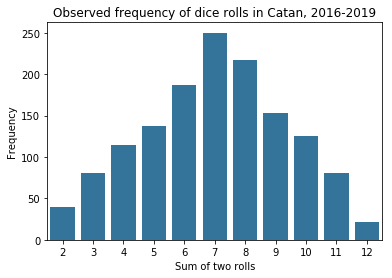

In [73]:
# Plot histogram!

fig_0 = sns.barplot(x = possible_rolls, y = outcome_count_array.flatten(), color = '#2378ab')
fig_0.set(xlabel = 'Sum of two rolls',
          ylabel = 'Frequency',
          title = 'Observed frequency of dice rolls in Catan, 2016-2019');


plt.savefig("L6_sum_dice_observed.pdf")

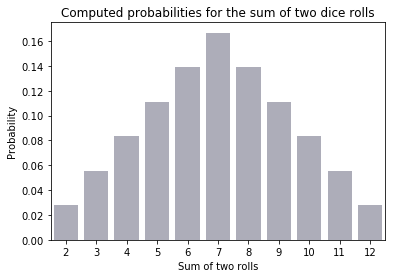

In [72]:
# Actual probabilities
expected_relative_frequency = (1/36)*np.concatenate((np.arange(1,7), np.arange(5,0,-1)))
expected_relative_frequency

fig_1 = sns.barplot(x = possible_rolls, y = expected_relative_frequency, color = '#ababbb')
fig_1.set(xlabel = 'Sum of two rolls',
          ylabel = 'Probability',
          title = 'Computed probabilities for the sum of two dice rolls');

plt.savefig("L6_sum_dice_expected.pdf")

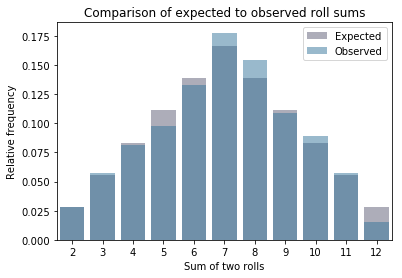

In [74]:
# Overlay the two

observed_relative_frequencies = outcome_count_array.flatten()/len(data_vec)

fig_2 = sns.barplot(x = possible_rolls,
                    y = expected_relative_frequency,
                    color = '#ababbb',
                    label = 'Expected')
sns.barplot(x = possible_rolls,
            y = observed_relative_frequencies,
            color = '#2378ab',
            alpha = 0.5,
            label = 'Observed')
fig_2.set(xlabel = 'Sum of two rolls',
          ylabel = 'Relative frequency',
          title = 'Comparison of expected to observed roll sums')
fig_2.legend();
plt.savefig("L6_sum_dice_overlay.pdf")

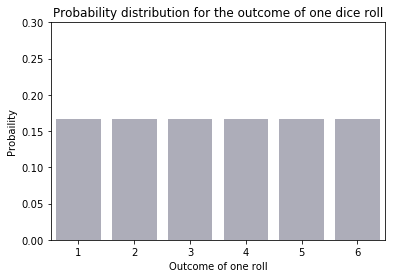

In [71]:
# Histogram showing probability of rolling each of the 6 numbers

fig_3 = sns.barplot(x = np.arange(1,7), y = np.full((6), (1/6)), color = '#ababbb')
fig_3.set(xlabel = 'Outcome of one roll',
          ylabel = 'Probaility',
          title = 'Probability distribution for the outcome of one dice roll', 
          ylim = (0, 0.3));

#lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
plt.savefig("L6_one_dice.pdf")


array([[0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667]])